# Food Environment Atlas

In [1]:
# include import statements here
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

import zipfile
from pathlib import Path

import os
import plotly

from pathlib import Path
data_dir = Path('.')
data_dir.mkdir(exist_ok = True)
file_path = data_dir / Path('data.zip')
dest_path = file_path

import folium
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

import geocoder
from geopy import *

from geopy.geocoders import Nominatim

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ModuleNotFoundError: No module named 'geopy'

## Food Access & Assistance in California

In [ ]:
food_access = pd.read_csv("/work/FoodEnvironmentAtlas - ACCESS.csv")
food_access

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
0,1001,AL,Autauga,18428.439690,17496.693040,-5.056026,33.769657,32.062255,5344.427472,6543.676824,...,471.136164,0.863345,86.767975,0.159000,61.169869,0.112092,8.817961,0.016159,482.848633,0.884808
1,1003,AL,Baldwin,35210.814080,30561.264430,-13.204891,19.318473,16.767489,9952.144027,9886.831137,...,1377.874834,0.755973,212.946378,0.116833,181.649648,0.099662,14.819634,0.008131,1127.696098,0.618712
2,1005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,2948.790251,...,509.377525,1.855183,17.096410,0.062266,39.960527,0.145539,8.082376,0.029436,462.382655,1.684025
3,1007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,596.162829,...,8.596762,0.037516,1.994318,0.008703,2.513097,0.010967,0.000000,0.000000,5.259244,0.022951
4,1009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,1650.959482,...,497.489891,0.867886,8.428994,0.014705,28.938242,0.050484,1.062851,0.001854,202.914186,0.353990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,13391.715500,18934.737810,41.391428,30.570505,43.224074,2414.618816,4750.905615,...,2661.350520,6.075311,114.722086,0.261887,189.621441,0.432866,27.720443,0.063280,1605.391465,3.664775
3139,56039,WY,Teton,6212.423697,6212.390430,-0.000535,29.174527,29.174370,1059.463554,1577.771012,...,736.174507,3.457192,53.489780,0.251196,32.482255,0.152542,8.468847,0.039771,460.434464,2.162273
3140,56041,WY,Uinta,4270.147119,4686.017653,9.739021,20.220414,22.189685,1518.415783,2054.179828,...,535.616715,2.536304,13.831709,0.065497,40.339658,0.191020,6.586104,0.031187,350.320469,1.658871
3141,56043,WY,Washakie,931.411647,931.411647,0.000000,10.915407,10.915407,233.628356,309.030331,...,35.474502,0.415733,6.366775,0.074614,5.006976,0.058678,0.000000,0.000000,34.160542,0.400334


In [ ]:
food_access_CA = food_access[food_access['State'] == 'CA']
food_access_CA

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
186,6001,CA,Alameda,160424.908700,107964.398400,-32.700976,10.622260,7.148677,24226.685780,15141.063320,...,13583.550390,0.899411,30754.542510,2.036359,435.030355,0.028805,519.576731,0.034403,10903.427220,0.721952
187,6003,CA,Alpine,652.595935,575.162592,-11.865435,55.540080,48.950008,152.611752,146.579098,...,24.474228,2.082913,4.000000,0.340426,24.852768,2.115129,0.000000,0.000000,22.728249,1.934319
188,6005,CA,Amador,4760.406704,5337.854488,12.130220,12.497458,14.013427,1199.901541,1360.366194,...,1242.173269,3.261068,75.626351,0.198541,95.937668,0.251864,15.523788,0.040754,528.865706,1.388427
189,6007,CA,Butte,48749.215500,46598.344070,-4.412115,22.158734,21.181065,15882.011850,16363.362410,...,5104.065166,2.320030,1997.877856,0.908126,914.690051,0.415768,75.481283,0.034310,3798.313186,1.726506
190,6009,CA,Calaveras,3907.397164,4578.261930,17.169096,8.572990,10.044894,978.595280,1252.353845,...,527.092038,1.156462,59.986456,0.131613,79.659275,0.174776,8.423721,0.018482,367.312235,0.805898
191,6011,CA,Colusa,1770.983312,1770.983312,0.000000,8.268282,8.268282,574.525635,632.169348,...,517.129613,2.414350,17.932957,0.083725,61.926199,0.289118,5.112865,0.023871,337.423846,1.575348
192,6013,CA,Contra Costa,206021.837900,200374.382300,-2.741193,19.639364,19.101011,28361.314140,31140.416960,...,34021.073430,3.243114,25948.544620,2.473587,873.906740,0.083307,710.301466,0.067711,23915.856320,2.279818
193,6015,CA,Del Norte,7755.453370,9166.139314,18.189600,27.107492,32.038236,2923.175949,4005.774693,...,1277.190779,4.464141,221.084774,0.772753,955.907233,3.341165,4.969712,0.017371,999.965287,3.495160
194,6017,CA,El Dorado,50565.681350,52705.456070,4.231674,27.927891,29.109709,8605.356903,10966.692510,...,6080.638551,3.358393,2051.120656,1.132853,551.483673,0.304590,70.500615,0.038938,3812.230288,2.105530
195,6019,CA,Fresno,113631.669300,85484.374840,-24.770642,12.212550,9.187423,50728.913560,38725.292280,...,38599.150680,4.148439,10923.182570,1.173968,1611.222947,0.173166,127.143185,0.013665,21349.734750,2.294560


In [ ]:
food_assistance = pd.read_csv("/work/FoodEnvironmentAtlas - ASSISTANCE.csv")
food_assistance

,FIPS,State,County,REDEMP_SNAPS12,REDEMP_SNAPS16,PCH_REDEMP_SNAPS_12_16,PCT_SNAP12,PCT_SNAP16,PCH_SNAP_12_16,PC_SNAPBEN10,...,REDEMP_WICS08,REDEMP_WICS12,PCH_REDEMP_WICS_08_12,PCT_WIC09,PCT_WIC15,PCH_WIC_09_15,PCT_CACFP09,PCT_CACFP15,PCH_CACFP_09_15,FDPIR12
0,1001,AL,Autauga,301432.08110,239024.01560,-20.703857,18.824675,16.976436,-1.848239,16.692321,...,161658.70,184744.30,14.280490,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0
1,1003,AL,Baldwin,274394.50370,155844.39020,-43.204260,18.824675,16.976436,-1.848239,14.139211,...,125840.50,126639.40,0.634881,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0
2,1005,AL,Barbour,325496.56080,281716.32600,-13.450291,18.824675,16.976436,-1.848239,27.558243,...,178230.60,157077.10,-11.868620,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0
3,1007,AL,Bibb,356444.03200,256026.91970,-28.171916,18.824675,16.976436,-1.848239,20.128737,...,92542.33,98263.40,6.182112,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0
4,1009,AL,Blount,229730.02260,141304.90070,-38.490886,18.824675,16.976436,-1.848239,19.157857,...,102945.90,149110.00,44.843050,2.990417,2.719352,-0.271065,0.91609,1.055597,0.139507,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,175896.93990,134109.73720,-23.756640,5.866367,5.817753,-0.048615,5.176232,...,102934.90,99272.63,-3.557832,2.450622,1.876008,-0.574614,1.75152,1.376839,-0.374681,0
3139,56039,WY,Teton,115388.18100,32511.17333,-71.824520,5.866367,5.817753,-0.048615,1.013588,...,NaN,NaN,NaN,2.450622,1.876008,-0.574614,1.75152,1.376839,-0.374681,0
3140,56041,WY,Uinta,260305.89690,154777.26870,-40.540237,5.866367,5.817753,-0.048615,9.754712,...,91415.11,NaN,NaN,2.450622,1.876008,-0.574614,1.75152,1.376839,-0.374681,0
3141,56043,WY,Washakie,132657.99000,97160.96053,-26.758305,5.866367,5.817753,-0.048615,8.545256,...,NaN,NaN,NaN,2.450622,1.876008,-0.574614,1.75152,1.376839,-0.374681,0


In [ ]:
food_assistance_CA = food_assistance[food_assistance['State'] == 'CA']
food_assistance_CA

,FIPS,State,County,REDEMP_SNAPS12,REDEMP_SNAPS16,PCH_REDEMP_SNAPS_12_16,PCT_SNAP12,PCT_SNAP16,PCH_SNAP_12_16,PC_SNAPBEN10,...,REDEMP_WICS08,REDEMP_WICS12,PCH_REDEMP_WICS_08_12,PCT_WIC09,PCT_WIC15,PCH_WIC_09_15,PCT_CACFP09,PCT_CACFP15,PCH_CACFP_09_15,FDPIR12
186,6001,CA,Alameda,256579.03430,216303.90900,-15.696967,10.474326,10.961725,0.487399,10.114024,...,213857.00,154690.70,-27.666320,3.893239,3.231603,-0.661636,0.886968,1.438477,0.551509,0
187,6003,CA,Alpine,0.00000,0.00000,NaN,10.474326,10.961725,0.487399,16.595745,...,NaN,NaN,NaN,3.893239,3.231603,-0.661636,0.886968,1.438477,0.551509,1
188,6005,CA,Amador,245695.05080,203341.20620,-17.238379,10.474326,10.961725,0.487399,9.910478,...,45614.78,48778.35,6.935406,3.893239,3.231603,-0.661636,0.886968,1.438477,0.551509,0
189,6007,CA,Butte,272449.25300,257367.68120,-5.535553,10.474326,10.961725,0.487399,15.167803,...,145260.10,172733.10,18.912990,3.893239,3.231603,-0.661636,0.886968,1.438477,0.551509,1
190,6009,CA,Calaveras,156719.76680,120754.89710,-22.948522,10.474326,10.961725,0.487399,13.184358,...,50815.05,52368.92,3.057880,3.893239,3.231603,-0.661636,0.886968,1.438477,0.551509,0
191,6011,CA,Colusa,67730.79524,52100.82406,-23.076610,10.474326,10.961725,0.487399,9.847176,...,144292.80,92348.02,-35.999550,3.893239,3.231603,-0.661636,0.886968,1.438477,0.551509,0
192,6013,CA,Contra Costa,274384.99190,233121.32250,-15.038603,10.474326,10.961725,0.487399,8.136365,...,183385.10,127646.00,-30.394560,3.893239,3.231603,-0.661636,0.886968,1.438477,0.551509,0
193,6015,CA,Del Norte,307468.03980,309279.88750,0.589280,10.474326,10.961725,0.487399,24.670861,...,132354.30,121268.10,-8.376112,3.893239,3.231603,-0.661636,0.886968,1.438477,0.551509,2
194,6017,CA,El Dorado,193476.90050,155367.54190,-19.697110,10.474326,10.961725,0.487399,7.573080,...,103533.30,97821.88,-5.516493,3.893239,3.231603,-0.661636,0.886968,1.438477,0.551509,0
195,6019,CA,Fresno,413425.08500,400299.21340,-3.174909,10.474326,10.961725,0.487399,29.675157,...,261891.10,162338.10,-38.013130,3.893239,3.231603,-0.661636,0.886968,1.438477,0.551509,3


# 

In [ ]:
food_access_grouped_state = food_access.groupby('State').mean().reset_index()
food_access_grouped_state

/tmp/ipykernel_1905/2515284163.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  food_access_grouped_state = food_access.groupby('State').mean().reset_index()


,State,FIPS,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
0,AK,2153.517241,7706.728874,7708.624532,922.203168,38.297912,48.343789,2053.135472,2241.191144,1015.307502,...,368.453289,1.399750,301.324695,1.537318,1700.145037,21.301019,42.262607,0.165562,586.446602,3.871688
1,AL,1067.000000,15304.357174,14371.804328,47.207020,16.678400,16.171105,5481.943274,5651.092540,51.919556,...,552.842856,0.488081,180.046252,0.108511,63.218617,0.075176,8.369111,0.007919,487.507197,0.441023
2,AR,5075.000000,8262.001127,7838.947589,31.900700,20.080609,22.609819,3274.724585,3399.598632,44.722023,...,476.997985,0.924264,84.476558,0.127928,52.639440,0.141694,12.873649,0.011281,408.809864,0.852200
3,AZ,4013.866667,81267.922268,83623.853433,6.261250,34.562835,36.370275,27796.406975,32146.580382,17.943113,...,19700.650274,8.123239,1594.582411,0.301255,8643.484570,8.541182,108.786634,0.036253,10102.882255,3.543934
4,CA,6058.000000,79221.516190,74540.508724,-5.074591,19.983087,19.344140,20072.888318,21137.059263,4.842081,...,21318.972468,4.047196,7268.077791,0.838045,758.600406,0.532330,238.416150,0.037212,12468.543354,2.569602
5,CO,8062.234375,16589.940793,14762.883231,-2.764070,30.009487,24.421296,4544.902611,4292.254913,11.286126,...,2872.467206,4.478425,345.214172,0.208094,167.307183,0.392667,20.729549,0.018456,1471.589015,2.120729
6,CT,9008.000000,129043.381885,129233.283214,2.468699,27.343535,27.963877,17394.568473,19404.683317,16.732846,...,8066.847368,1.656284,4449.394596,0.896398,276.540281,0.077966,35.538269,0.009324,5040.415818,1.139846
7,DC,11001.000000,16970.705650,12688.280100,-25.234222,2.820352,2.108658,5764.584305,4728.931789,-17.965780,...,507.095807,0.084274,209.983925,0.034897,42.355688,0.007039,4.539406,0.000754,444.851021,0.073930
8,DE,10003.000000,76734.408877,58462.083833,-20.895297,22.369567,17.489165,17503.363132,13991.578900,-13.341383,...,3992.394663,1.168548,2662.822227,0.605644,237.098949,0.091978,26.908417,0.010374,3123.936402,0.953105
9,FL,12067.910448,62608.459665,59500.003178,-1.787047,24.076956,23.765402,18331.498504,20115.857235,13.747710,...,8855.617755,2.735645,1420.576070,0.349816,230.310492,0.181015,41.944874,0.014772,3244.946118,1.266401


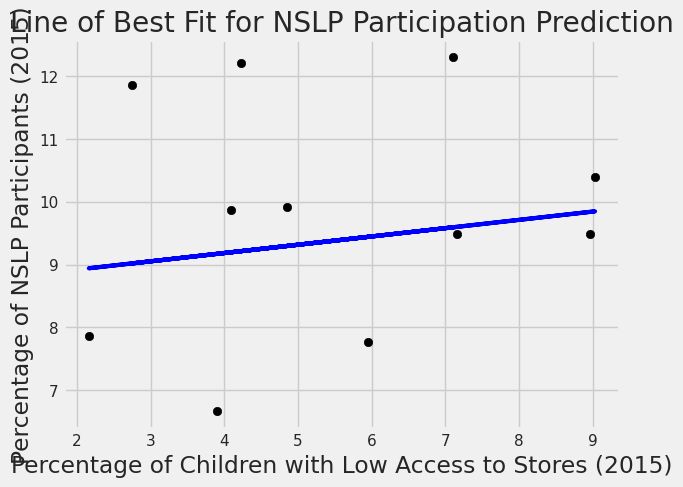

In [ ]:
# Assuming food_access and food_assistance are pandas DataFrames that have been loaded correctly

# Grouping and calculating the mean for each state
food_access_grouped = food_access.groupby('State')['PCT_LACCESS_CHILD15'].mean().reset_index()
food_assistance_grouped = food_assistance.groupby('State')['PCT_NSLP15'].mean().reset_index()

# Merging the grouped data on 'State' to ensure matching indices
merged_data = pd.merge(food_access_grouped, food_assistance_grouped, on='State')

# Selecting the feature and target variable
X = merged_data[['PCT_LACCESS_CHILD15']]  # Feature: % of children with low access to stores
y = merged_data['PCT_NSLP15']  # Target: % of NSLP participants

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plotting the line of best fit
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Percentage of Children with Low Access to Stores (2015)')
plt.ylabel('Percentage of NSLP Participants (2015)')
plt.title('Line of Best Fit for NSLP Participation Prediction')
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.273668219444893
R-squared: -0.03844051654115721


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming food_access and food_assistance are pandas DataFrames that have been loaded correctly

# Grouping and calculating the mean for each state
food_access_grouped = food_access.groupby('State').mean().reset_index()
food_assistance_grouped = food_assistance.groupby('State').mean().reset_index()

# Merging the grouped data on 'State' to ensure matching indices
merged_data = pd.merge(food_access_grouped, food_assistance_grouped, on='State')

# Selecting the feature and target variable
X = merged_data[['LACCESS_HHNV15', 'PCT_LACCESS_CHILD15', 'LACCESS_SNAP15']]  # Feature: % of children with low access to stores
y = merged_data['PCT_NSLP15']  # Target: % of NSLP participants

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# It's a good practice to scale your data for neural network training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/tmp/ipykernel_1905/596438766.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  food_access_grouped = food_access.groupby('State').mean().reset_index()
/tmp/ipykernel_1905/596438766.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  food_assistance_grouped = food_assistance.groupby('State').mean().reset_index()


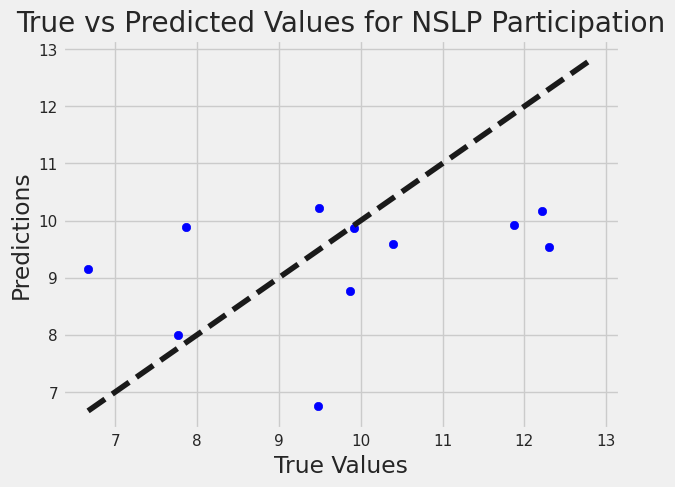

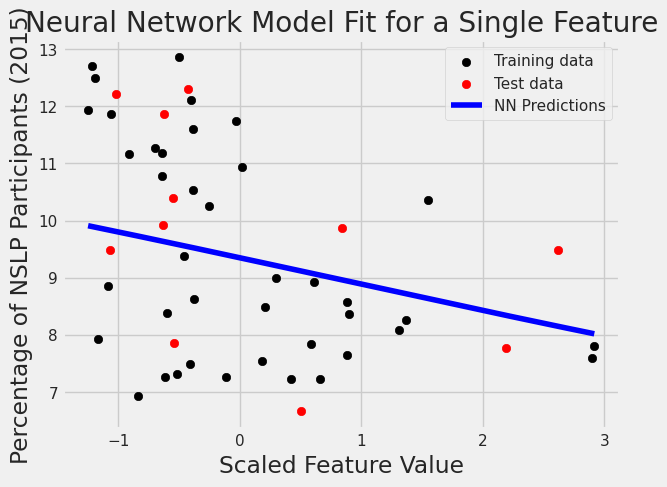

In [ ]:
# Create a neural network model
nn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='logistic', random_state=1, max_iter=500)

# Fit the model on the training data
nn_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = nn_model.predict(X_test_scaled)

# Plotting the predictions
# Since we have multiple features, we cannot plot them directly on a 2D scatter plot.
# Instead, we can plot the true vs predicted values to see how well our model is performing.

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Plot a diagonal line for reference
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values for NSLP Participation')
plt.show()

# If you want to visualize the model's performance in the feature space, you would need to reduce the dimensionality
# of the features to 2D using a technique like PCA, or select a single feature for visualization.
# Here's an example of plotting with a single feature:

# Choose a single feature index to plot (e.g., 0 for 'LACCESS_HHNV15')
feature_index = 0

# Generate a sequence of values for the selected feature across its range
x_values = np.linspace(X_train_scaled[:, feature_index].min(), X_train_scaled[:, feature_index].max(), 200).reshape(-1, 1)

# We need to create a full feature set for predictions. We'll use the mean values for all other features.
other_features_mean = np.mean(X_train_scaled[:, [i for i in range(X_train_scaled.shape[1]) if i != feature_index]], axis=0)
x_values_full = np.hstack([x_values] + [np.full_like(x_values, mean) for mean in other_features_mean])

# Predict y values for our sequence of x values
y_values = nn_model.predict(x_values_full)

# Plot the original data (for the single feature)
plt.scatter(X_train_scaled[:, feature_index], y_train, color='black', label='Training data')
plt.scatter(X_test_scaled[:, feature_index], y_test, color='red', label='Test data')

# Plot the line (curve) of best fit for the single feature
plt.plot(x_values, y_values, color='blue', label='NN Predictions')

plt.xlabel('Scaled Feature Value')
plt.ylabel('Percentage of NSLP Participants (2015)')
plt.title('Neural Network Model Fit for a Single Feature')
plt.legend()
plt.show()

In [ ]:
statelatlon = pd.read_csv('/work/State Latitude and Longitude.csv')
statelatlon

,State Full Name,State,Latitude,Longitude
0,Alabama,AL,32.80167,-86.79417
1,Alaska,AK,64.28110,-149.81830
2,Arizona,AZ,34.72778,-111.66050
3,Arkansas,AR,35.20105,-92.17929
4,California,CA,37.27330,-119.41790
5,Colorado,CO,39.05910,-105.50890
6,Connecticut,CT,41.59859,-72.70751
7,Delaware,DE,38.91083,-75.50567
8,District of Columbia,DC,38.90722,-77.00306
9,Florida,FL,29.53110,-84.07170


In [ ]:
merged_df = food_access_grouped_state.merge(statelatlon, on='State')
merged_df

,State,FIPS,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,...,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15,State Full Name,Latitude,Longitude
0,AK,2153.517241,7706.728874,7708.624532,922.203168,38.297912,48.343789,2053.135472,2241.191144,1015.307502,...,1.537318,1700.145037,21.301019,42.262607,0.165562,586.446602,3.871688,Alaska,64.28110,-149.81830
1,AL,1067.000000,15304.357174,14371.804328,47.207020,16.678400,16.171105,5481.943274,5651.092540,51.919556,...,0.108511,63.218617,0.075176,8.369111,0.007919,487.507197,0.441023,Alabama,32.80167,-86.79417
2,AR,5075.000000,8262.001127,7838.947589,31.900700,20.080609,22.609819,3274.724585,3399.598632,44.722023,...,0.127928,52.639440,0.141694,12.873649,0.011281,408.809864,0.852200,Arkansas,35.20105,-92.17929
3,AZ,4013.866667,81267.922268,83623.853433,6.261250,34.562835,36.370275,27796.406975,32146.580382,17.943113,...,0.301255,8643.484570,8.541182,108.786634,0.036253,10102.882255,3.543934,Arizona,34.72778,-111.66050
4,CA,6058.000000,79221.516190,74540.508724,-5.074591,19.983087,19.344140,20072.888318,21137.059263,4.842081,...,0.838045,758.600406,0.532330,238.416150,0.037212,12468.543354,2.569602,California,37.27330,-119.41790
5,CO,8062.234375,16589.940793,14762.883231,-2.764070,30.009487,24.421296,4544.902611,4292.254913,11.286126,...,0.208094,167.307183,0.392667,20.729549,0.018456,1471.589015,2.120729,Colorado,39.05910,-105.50890
6,CT,9008.000000,129043.381885,129233.283214,2.468699,27.343535,27.963877,17394.568473,19404.683317,16.732846,...,0.896398,276.540281,0.077966,35.538269,0.009324,5040.415818,1.139846,Connecticut,41.59859,-72.70751
7,DC,11001.000000,16970.705650,12688.280100,-25.234222,2.820352,2.108658,5764.584305,4728.931789,-17.965780,...,0.034897,42.355688,0.007039,4.539406,0.000754,444.851021,0.073930,District of Columbia,38.90722,-77.00306
8,DE,10003.000000,76734.408877,58462.083833,-20.895297,22.369567,17.489165,17503.363132,13991.578900,-13.341383,...,0.605644,237.098949,0.091978,26.908417,0.010374,3123.936402,0.953105,Delaware,38.91083,-75.50567
9,FL,12067.910448,62608.459665,59500.003178,-1.787047,24.076956,23.765402,18331.498504,20115.857235,13.747710,...,0.349816,230.310492,0.181015,41.944874,0.014772,3244.946118,1.266401,Florida,29.53110,-84.07170


In [ ]:
# Create a custom heuristic from the following features
# LACCESS_LOWI15 + PCT_LACCESS_LOWI15 +  PCT_LACCESS_HHNV15 + LACCESS_CHILD15

heuristic = merged_df['LACCESS_LOWI15'] * 0.25 + merged_df['PCT_LACCESS_LOWI15'] * 0.25 + merged_df['PCT_LACCESS_HHNV15'] * 0.25 + merged_df['LACCESS_CHILD15'] * 0.25
standardized_heuristic = ( heuristic - np.mean(heuristic) ) / np.std(heuristic)
standardized_heuristic

0    -0.755068
1    -0.381307
2    -0.679396
3     2.956857
4     2.012843
5    -0.464238
6     2.755456
7    -0.454524
8     1.047916
9     1.489492
10   -0.344103
11    1.819153
12   -0.855477
13   -0.740057
14   -0.203805
15   -0.391914
16   -0.787224
17   -0.818418
18   -0.231643
19    2.642649
20    0.473402
21   -0.672723
22   -0.016893
23   -0.532630
24   -0.592442
25   -0.626041
26   -0.904063
27   -0.235672
28   -0.966459
29   -0.936086
30    0.025157
31    1.848529
32    0.002791
33    0.029870
34    0.081970
35    0.175653
36   -0.552274
37   -0.319430
38    0.253302
39    0.420430
40    0.058263
41   -0.916621
42   -0.341947
43    0.068834
44   -0.154822
45   -0.669602
46   -0.893843
47    0.409118
48   -0.517929
49   -0.825229
50   -0.789807
dtype: float64

In [ ]:
merged_df['heuristic'] = standardized_heuristic

In [ ]:
import folium
from folium.plugins import HeatMap

# Create a map centered around the geographic center of the United States
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Create a heatmap layer
heatmap = HeatMap(
    list(zip(merged_df['Latitude'], merged_df['Longitude'], merged_df['heuristic'])),
    min_opacity=0.2,
    radius=20, blur=15,
    max_zoom=1,
)

# Add the heatmap layer to the map
m.add_child(heatmap)

# Display the map
m.save('heatmap.html')

m

In [ ]:
import folium
from folium.plugins import HeatMap

# Create a map centered around the geographic center of the United States
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Create a heatmap layer
heatmap = HeatMap(
    list(zip(merged_df['Latitude'], merged_df['Longitude'], merged_df['PCT_LACCESS_HHNV15'])),
    min_opacity=0.2,
    radius=20, blur=15,
    max_zoom=1,
)

# Add the heatmap layer to the map
m.add_child(heatmap)

# Display the map
m.save('heatmap.html')

m

NameError: name 'merged_df' is not defined

## 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=008b30f3-1127-48f8-a4b4-f5cb6476cfc1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>